# Feature-Based ML Song Classification

In [3]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Import datasets
df_3sec = pd.read_csv('features_3_sec.csv').set_index('filename')
df_30sec = pd.read_csv('features_30_sec.csv').set_index('filename')

In [30]:
df_3sec

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
filename,,,,,,,,,,,,,,,,,,,,,
blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock


In [32]:
df_30sec

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
filename,,,,,,,,,,,,,,,,,,,,,
blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,4253.557033,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,4149.338328,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,4031.405321,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock


In [54]:
x = df_3sec.iloc[:, 1:-1].values
y = df_3sec.iloc[:, -1:].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Random Forest Classification
#### 3 Second Data Set

[0.8342092092092092, 0.9991241241241241, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493]
[0.56006006006006, 0.8303303303303303, 0.8588588588588588, 0.8718718718718719, 0.8743743743743744, 0.8828828828828829, 0.8803803803803804, 0.8763763763763763, 0.87987987987988, 0.8848848848848849, 0.8818818818818819, 0.8863863863863863, 0.8883883883883884, 0.8868868868868869, 0.8808808808808809, 0.8893893893893894, 0.8863863863863863, 0.8843843843843844, 0.8853853853853854, 0.8863863863863863, 0.8878878878878879, 0.8898898898898899, 0.8918918918918919, 0.8863863863863863, 0.8913913913913913]
[1

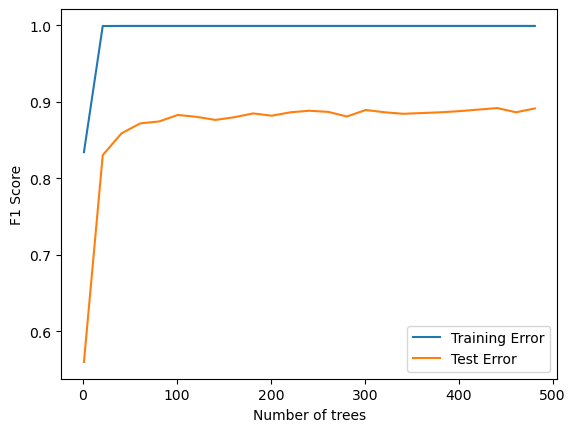

In [46]:
# Determine best number of trees
train_scores = []
test_scores = []
trees = []

for size in range(1,501, 20):
        # Initiate classifier
        tree_model = RandomForestClassifier(n_estimators=size)
        
        # Fit model: ravel() function flattens the y array to prevent warning messages from popping up
        tree_model.fit(x_train, y_train.ravel())
        
        # Predict using train and test data
        y_pred_tr = tree_model.predict(x_train)
        y_pred_te = tree_model.predict(x_test)
        
        # Test error using F_1 score
        train_er = f1_score(y_train, y_pred_tr, average='micro')
        test_er = f1_score(y_test, y_pred_te, average='micro')
        
        # Add error values to the list for plotting
        train_scores.append(train_er)
        test_scores.append(test_er)
        trees.append(size)

print(train_scores)
print(test_scores)
print(trees)

# Plot errors on a graph
plt.plot(trees, train_scores, label='Train')
plt.plot(trees, test_scores, label='Test')
plt.xlabel("Number of trees")
plt.ylabel("F1 Score")
plt.title("Train and Test Score for Trees in Random Forest (30 sec)")
plt.legend()

Since the training score is constant, the highest test score will choose the best number of trees for the model. This is achieved at 441 trees, with an f1 score of 0.89189

[0.3591091091091091, 0.43593593593593594, 0.5153903903903904, 0.5770770770770771, 0.6491491491491491, 0.7245995995995997, 0.7910410410410411, 0.8582332332332332, 0.9166666666666666, 0.9627127127127127, 0.9858608608608609, 0.9948698698698699, 0.9982482482482482, 0.9991241241241241, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493, 0.9992492492492493]
[0.347847847847847

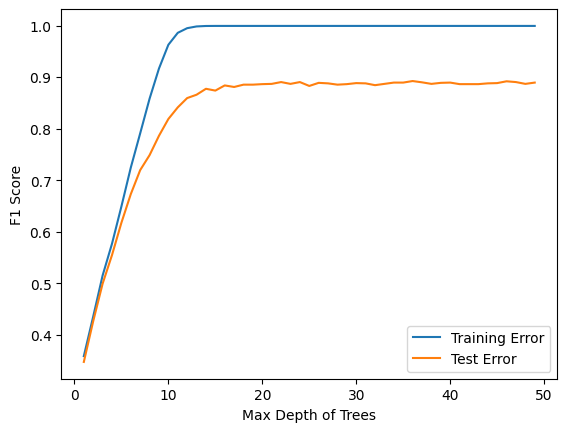

In [7]:
# Determine best depth of the trees
train_scores = []
test_scores = []
depths = []

for depth in range(1, 50):
        # Initiate Classifier
        tree_model = RandomForestClassifier(n_estimators=441, max_depth=depth)
        
        # Fit model
        tree_model.fit(x_train, y_train.ravel())
        
        # Predict using train and test data
        y_pred_tr = tree_model.predict(x_train)
        y_pred_te = tree_model.predict(x_test)
        
        # Test error using F_1 score
        train_er = f1_score(y_train, y_pred_tr, average='micro')
        test_er = f1_score(y_test, y_pred_te, average='micro')
        
        # Add error values to the list for plotting
        train_scores.append(train_er)
        test_scores.append(test_er)
        depths.append(depth)

print(train_scores)
print(test_scores)
print(depths)

# Plot errors on a graph
plt.plot(depths, train_scores, label='Train')
plt.plot(depths, test_scores, label='Test')
plt.xlabel("Max Depth of Trees")
plt.ylabel("F1 Score")
plt.legend()

Training Score plateaues at 1 around a max depth of 12. The highest f1 score for the test set is achieved at a max-depth of 36 with 0.89239, which just barely beats the score of 0.89189 achieved by no max-depth. These metrics are very comparable and I do not believe that there would be a significant difference between using a depth of 36 or Max.

In [55]:
# Train the Model under Ideal Parameters
rfc = RandomForestClassifier(n_estimators=441, max_depth=36)

# Fit model to the data
rfc.fit(x_train, y_train.ravel())

# Predict the labels of the test data set
y_pred = rfc.predict(x_test)

# Get the confusion Matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)

Text(0.5, 1.0, 'Genre Classification Using a Random Forest')

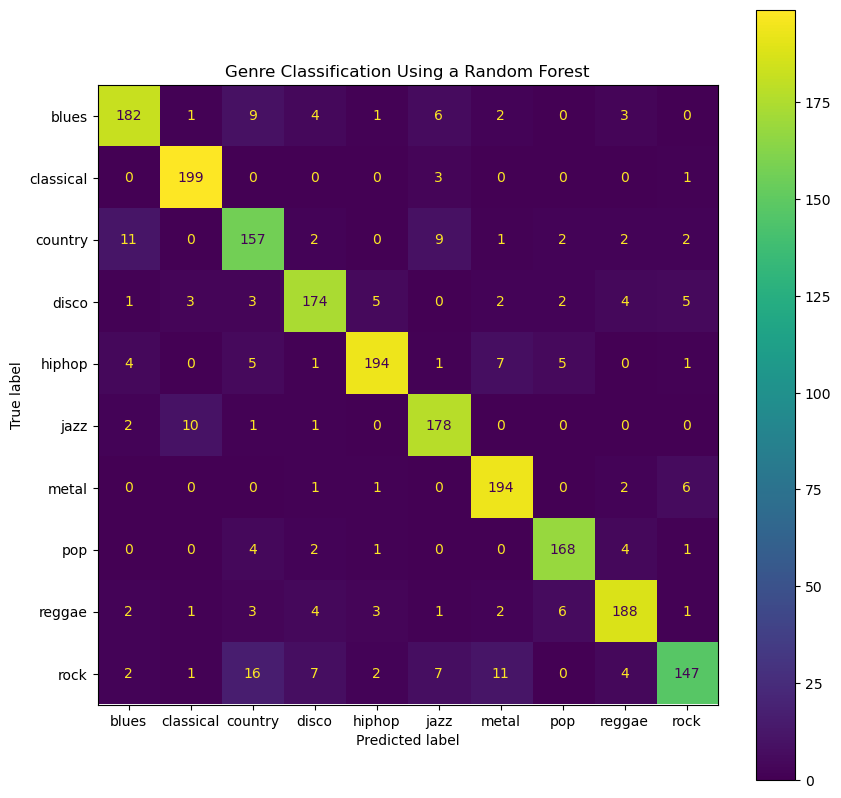

In [49]:
# Displays the Confusion Matrix
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y_test))
conf_mat_disp.plot()

plt.gcf().set_size_inches(10, 10)

# Turns off the grid
plt.grid(False)
plt.title('Genre Classification Using a Random Forest (3 sec)')

Text(0.5, 0, 'Feature importance\n(Mean decrease in Gini across all Decision Trees)')

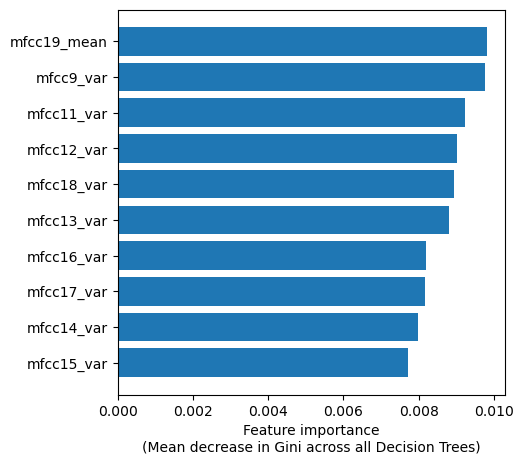

In [56]:
# Feature Importance
feat_list = df_3sec.iloc[:, 1:-1].columns
feat_import = rfc.feature_importances_

idx = np.argsort(feat_import).astype(int)
feat_list = [feat_list[_idx] for _idx in idx]
feat_import = feat_import[idx] 

# limit to the first 10 features
feat_list = feat_list[:10]
feat_import = feat_import[:10]

# Plot Feature Importances
plt.barh(feat_list, feat_import)
plt.gcf().set_size_inches(5, len(feat_list) / 2)
plt.xlabel('Feature importance\n(Mean decrease in Gini across all Decision Trees)')

#### 30 Second Data Set

In [50]:
x = df_30sec.iloc[:, 1:-1].values
y = df_30sec.iloc[:, -1:].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

[0.79625, 0.9975, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875]
[0.405, 0.64, 0.67, 0.69, 0.645, 0.665, 0.655, 0.7100000000000001, 0.64, 0.67, 0.675, 0.695, 0.675, 0.665, 0.68, 0.655, 0.685, 0.66, 0.695, 0.67, 0.665, 0.715, 0.675, 0.67, 0.685]
[1, 21, 41, 61, 81, 101, 121, 141, 161, 181, 201, 221, 241, 261, 281, 301, 321, 341, 361, 381, 401, 421, 441, 461, 481]


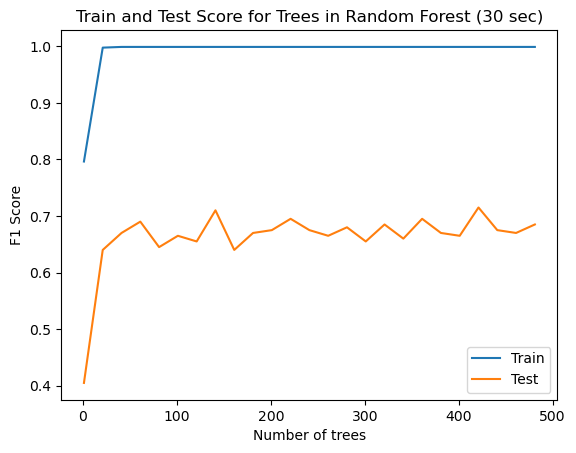

In [45]:
# Determine best number of trees
train_scores = []
test_scores = []
trees = []

for size in range(1,501, 20):
        # Initiate classifier
        tree_model = RandomForestClassifier(n_estimators=size)
        
        # Fit model: ravel() function flattens the y array to prevent warning messages from popping up
        tree_model.fit(x_train, y_train.ravel())
        
        # Predict using train and test data
        y_pred_tr = tree_model.predict(x_train)
        y_pred_te = tree_model.predict(x_test)
        
        # Test error using F_1 score
        train_er = f1_score(y_train, y_pred_tr, average='micro')
        test_er = f1_score(y_test, y_pred_te, average='micro')
        
        # Add error values to the list for plotting
        train_scores.append(train_er)
        test_scores.append(test_er)
        trees.append(size)

print(train_scores)
print(test_scores)
print(trees)

# Plot errors on a graph
plt.plot(trees, train_scores, label='Train')
plt.plot(trees, test_scores, label='Test')
plt.xlabel("Number of trees")
plt.ylabel("F1 Score")
plt.title("Train and Test Score for Trees in Random Forest (30 sec)")
plt.legend()

Best score is achieved at 141 trees

[0.335, 0.4975, 0.615, 0.7662500000000001, 0.8537499999999999, 0.925, 0.96875, 0.9925, 0.9975, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875, 0.99875]
[0.25, 0.375, 0.485, 0.505, 0.625, 0.635, 0.64, 0.66, 0.69, 0.68, 0.675, 0.7, 0.68, 0.66, 0.65, 0.66, 0.665, 0.64, 0.695, 0.695, 0.69, 0.685, 0.7100000000000001, 0.68, 0.68, 0.69, 0.7100000000000001, 0.67, 0.685, 0.72, 0.69, 0.69, 0.66, 0.67, 0.69, 0.655, 0.675, 0.68, 0.675, 0.65, 0.645, 0.66, 0.665, 0.715, 0.68, 0.665, 0.7, 0.69, 0.675]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


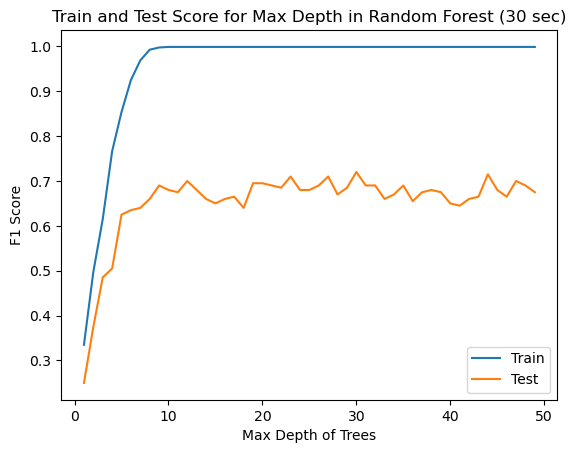

In [46]:
# Determine best depth of the trees
train_scores = []
test_scores = []
depths = []

for depth in range(1, 50):
        # Initiate Classifier
        tree_model = RandomForestClassifier(n_estimators=141, max_depth=depth)
        
        # Fit model
        tree_model.fit(x_train, y_train.ravel())
        
        # Predict using train and test data
        y_pred_tr = tree_model.predict(x_train)
        y_pred_te = tree_model.predict(x_test)
        
        # Test error using F_1 score
        train_er = f1_score(y_train, y_pred_tr, average='micro')
        test_er = f1_score(y_test, y_pred_te, average='micro')
        
        # Add error values to the list for plotting
        train_scores.append(train_er)
        test_scores.append(test_er)
        depths.append(depth)

print(train_scores)
print(test_scores)
print(depths)

# Plot errors on a graph
plt.plot(depths, train_scores, label='Train')
plt.plot(depths, test_scores, label='Test')
plt.xlabel("Max Depth of Trees")
plt.ylabel("F1 Score")
plt.title("Train and Test Score for Max Depth in Random Forest (30 sec)")
plt.legend()

Best Score achieved at max_depth of 30

In [51]:
# Train the Model under Ideal Parameters
rfc = RandomForestClassifier(n_estimators=141, max_depth=30)

# Fit model to the data
rfc.fit(x_train, y_train.ravel())

# Predict the labels of the test data set
y_pred = rfc.predict(x_test)

# Get the confusion Matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)

Text(0.5, 1.0, 'Genre Classification Using a Random Forest (30 sec)')

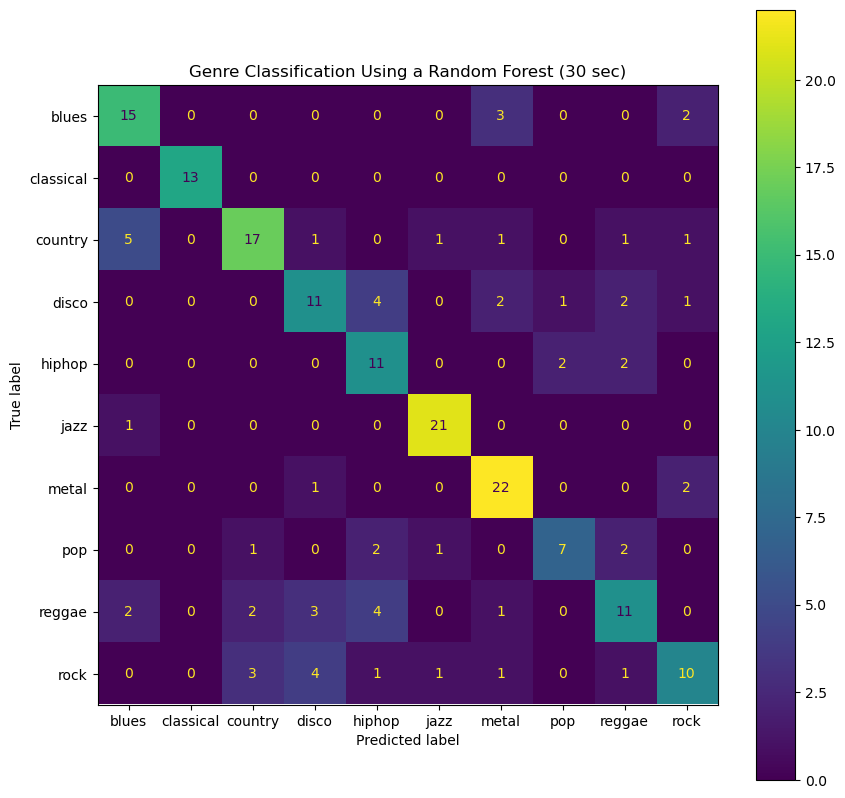

In [52]:
# Displays the Confusion Matrix
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y_test))
conf_mat_disp.plot()

plt.gcf().set_size_inches(10, 10)

# Turns off the grid
plt.grid(False)
plt.title('Genre Classification Using a Random Forest (30 sec)')

Text(0.5, 0, 'Feature importance\n(Mean decrease in Gini across all Decision Trees)')

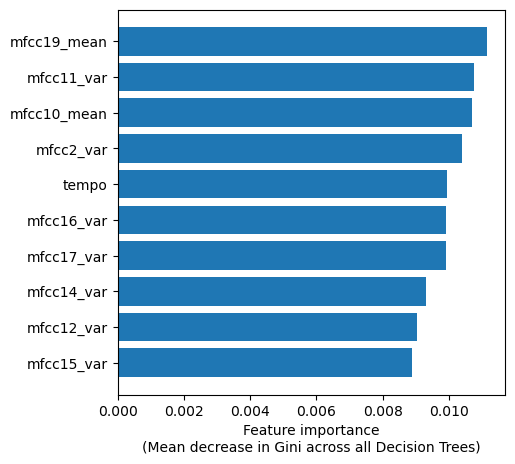

In [53]:
# Feature Importance
feat_list = df_30sec.iloc[:, 1:-1].columns
feat_import = rfc.feature_importances_

idx = np.argsort(feat_import).astype(int)
feat_list = [feat_list[_idx] for _idx in idx]
feat_import = feat_import[idx] 

# limit to the first 10 features
feat_list = feat_list[:10]
feat_import = feat_import[:10]

# Plot Feature Importances
plt.barh(feat_list, feat_import)
plt.gcf().set_size_inches(5, len(feat_list) / 2)
plt.xlabel('Feature importance\n(Mean decrease in Gini across all Decision Trees)')

### K-Nearest Neighbors
#### 3 Second Data Set

In [25]:
# Scale the data

df_3sec_scaled = pd.DataFrame()

for feat in df_3sec.columns:
    if type(df_3sec[feat].iloc[0]) != str:
        df_3sec_scaled[f'{feat}_scaled'] = df_3sec[feat] / df_3sec[feat].std()
    else:
        df_3sec_scaled[f'{feat}_scaled'] = df_3sec[feat]

df_3sec_scaled

,length_scaled,chroma_stft_mean_scaled,chroma_stft_var_scaled,rms_mean_scaled,rms_var_scaled,spectral_centroid_mean_scaled,spectral_centroid_var_scaled,spectral_bandwidth_mean_scaled,spectral_bandwidth_var_scaled,rolloff_mean_scaled,...,mfcc16_var_scaled,mfcc17_mean_scaled,mfcc17_var_scaled,mfcc18_mean_scaled,mfcc18_var_scaled,mfcc19_mean_scaled,mfcc19_var_scaled,mfcc20_mean_scaled,mfcc20_var_scaled,label_scaled
filename,,,,,,,,,,,,,,,,,,,,,
blues.00000.0.wav,inf,3.707550,9.448155,1.902462,0.981977,2.358236,0.385185,3.627339,1.157723,2.262127,...,1.152262,-0.570911,1.002406,0.139387,0.997958,-0.987976,0.808405,-0.046262,0.942459,blues
blues.00000.1.wav,inf,3.792212,8.939494,1.644155,0.404304,2.416264,0.208122,3.695936,0.647968,2.356595,...,1.879878,-1.066565,1.117497,0.030690,1.342796,-0.555127,2.333275,1.101046,1.290647,blues
blues.00000.2.wav,inf,3.833658,9.572119,1.925781,1.288589,2.378818,0.256130,3.832947,0.741239,2.434519,...,1.955025,-0.311519,0.778793,0.459105,1.197514,-0.379206,1.275700,0.479204,0.712793,blues
blues.00000.3.wav,inf,4.019629,9.013133,1.933970,0.682604,2.201590,0.257383,3.603979,0.818088,2.173056,...,1.386050,-0.676572,0.778478,0.235189,0.910779,-0.700409,1.222446,0.691167,0.689508,blues
blues.00000.4.wav,inf,3.709463,9.145170,2.090422,0.474362,2.168828,0.183158,3.582767,0.594018,2.113188,...,0.880775,0.117058,1.260441,0.326065,1.345402,-0.663659,0.642981,0.102215,0.627564,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rock.00099.5.wav,inf,3.859209,8.355133,0.729724,0.027157,1.993831,0.377656,3.160234,0.847866,1.836443,...,1.233522,-1.601843,1.052916,-0.819672,0.813310,-1.100554,1.173579,0.346229,0.839006,rock
rock.00099.6.wav,inf,4.118290,8.574145,0.844650,0.024454,2.457856,0.646156,3.505476,0.983982,2.281696,...,0.941131,-2.179831,1.824653,-0.594690,1.425311,-2.339792,1.525820,0.081637,0.402570,rock
rock.00099.7.wav,inf,3.841021,9.237619,0.764499,0.195575,1.790435,1.524162,2.871833,1.369139,1.487372,...,2.271247,-0.444656,0.598313,0.928324,0.680534,0.347370,1.168248,-0.057021,0.895418,rock


In [39]:
x = df_3sec_scaled.iloc[:, 1:-1].values
y = df_3sec_scaled.iloc[:, -1:].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

[0.9992492492492493, 0.9543293293293293, 0.9554554554554554, 0.9436936936936937, 0.9368118118118118, 0.9264264264264265, 0.9214214214214215, 0.9151651651651653, 0.9082832832832833, 0.9022772772772772]
[0.91991991991992, 0.8903903903903904, 0.9144144144144143, 0.9014014014014013, 0.9024024024024024, 0.8928928928928928, 0.8878878878878879, 0.8823823823823825, 0.8803803803803804, 0.8713713713713713]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


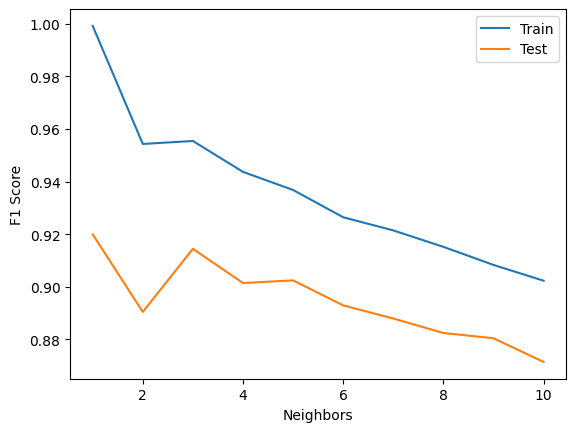

In [26]:
# Find the Optimal K
train_scores = []
test_scores = []
neighbors = []

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit model
    knn.fit(x_train, y_train.ravel())
        
    # Predict using train and test data
    y_pred_tr = knn.predict(x_train)
    y_pred_te = knn.predict(x_test)
        
    # Test error using F_1 score
    train_er = f1_score(y_train, y_pred_tr, average='micro')
    test_er = f1_score(y_test, y_pred_te, average='micro')
        
    # Add error values to the list for plotting
    train_scores.append(train_er)
    test_scores.append(test_er)
    neighbors.append(k)
    
print(train_scores)
print(test_scores)
print(neighbors)

# Plot errors on a graph
plt.plot(neighbors, train_scores, label='Train')
plt.plot(neighbors, test_scores, label='Test')
plt.xlabel("Neighbors")
plt.ylabel("F1 Score")
plt.title("Train and Test Score for Neighbors in KNN Classification (3 sec)")
plt.legend()

Best value of K achieved at 3 neighbors, with train score of 0.955 and test score of 0.914

In [40]:
# Train the Model under Ideal Parameters
knn = KNeighborsClassifier(n_neighbors=3)

# Fit model to the data
knn.fit(x_train, y_train.ravel())

# Predict the labels of the test data set
y_pred = knn.predict(x_test)

# Get the confusion Matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)

Text(0.5, 1.0, 'Genre Classification Using K-Nearest Neighbors Classification (3 sec)')

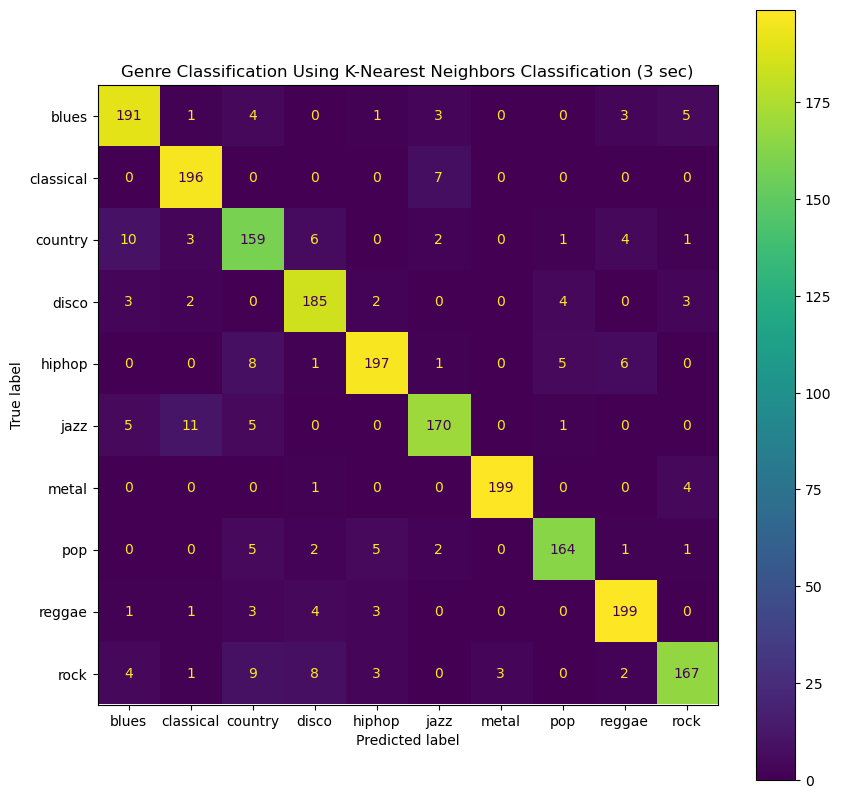

In [41]:
# Displays the Confusion Matrix
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y_test))
conf_mat_disp.plot()

plt.gcf().set_size_inches(10, 10)

# Turns off the grid
plt.grid(False)

plt.title("Genre Classification Using K-Nearest Neighbors Classification (3 sec)")

#### 30 Second Data Set

In [33]:
# Scale the data

df_30sec_scaled = pd.DataFrame()

for feat in df_30sec.columns:
    if type(df_30sec[feat].iloc[0]) != str:
        df_30sec_scaled[f'{feat}_scaled'] = df_30sec[feat] / df_30sec[feat].std()
    else:
        df_30sec_scaled[f'{feat}_scaled'] = df_30sec[feat]

df_30sec_scaled

,length_scaled,chroma_stft_mean_scaled,chroma_stft_var_scaled,rms_mean_scaled,rms_var_scaled,spectral_centroid_mean_scaled,spectral_centroid_var_scaled,spectral_bandwidth_mean_scaled,spectral_bandwidth_var_scaled,rolloff_mean_scaled,...,mfcc16_var_scaled,mfcc17_mean_scaled,mfcc17_var_scaled,mfcc18_mean_scaled,mfcc18_var_scaled,mfcc19_mean_scaled,mfcc19_var_scaled,mfcc20_mean_scaled,mfcc20_var_scaled,label_scaled
filename,,,,,,,,,,,,,,,,,,,,,
blues.00000.wav,370.945377,4.284788,11.474227,1.982670,0.777740,2.491989,0.323707,3.804648,0.890386,2.416726,...,1.551743,-0.371500,1.090949,-0.105704,1.209149,-0.613299,1.481196,0.318293,1.037753,blues
blues.00001.wav,370.945377,4.172499,12.278810,1.460768,0.652838,2.137236,0.937517,3.874164,2.217016,2.254598,...,1.638638,-0.160697,1.801554,0.076264,1.398774,-0.075485,1.374760,0.138446,1.012332,blues
blues.00002.wav,370.945377,4.450617,11.024164,2.672992,0.755514,2.168851,0.390291,3.320630,0.790562,1.931849,...,1.201789,-1.698815,1.422957,-0.469464,1.522649,-0.915804,1.254610,-0.581510,0.675968,blues
blues.00003.wav,370.945377,4.954229,12.151960,2.148086,1.746140,1.494645,0.459856,3.033181,1.725575,1.387324,...,1.315133,-0.729630,1.499639,0.164629,1.084796,-0.164837,1.002289,-0.888049,0.706398,blues
blues.00004.wav,370.945377,3.776103,11.355862,1.393489,0.633759,2.562996,0.856574,3.321523,0.916952,2.273163,...,2.548676,-1.198769,2.248255,-0.236973,1.558455,-1.172758,1.692305,-3.050095,1.220362,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rock.00095.wav,370.945377,4.308956,10.405165,1.210141,0.094969,2.804832,0.703854,4.002423,0.918658,2.701029,...,1.333568,-2.921070,1.247192,0.642046,1.069092,-1.787365,1.475921,-0.311124,1.104407,rock
rock.00096.wav,370.945377,4.879602,9.706881,1.164047,0.161839,2.803008,0.454265,3.930985,0.854548,2.634849,...,1.002066,-2.384402,1.176705,0.486218,0.930471,-1.986575,1.054384,-0.728520,0.702513,rock
rock.00097.wav,370.945377,5.289060,9.730523,1.243105,0.088692,2.901733,0.577845,3.661852,0.774627,2.559961,...,0.994525,-2.823329,1.086265,0.889347,1.046484,-3.351495,1.143312,-0.548953,0.660325,rock


In [34]:
x = df_30sec_scaled.iloc[:, 1:-1].values
y = df_30sec_scaled.iloc[:, -1:].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

[1.0, 0.84125, 0.8175, 0.8075, 0.78375, 0.7762499999999999, 0.76125, 0.765, 0.75, 0.72875]
[0.675, 0.6, 0.655, 0.64, 0.655, 0.655, 0.685, 0.68, 0.67, 0.675]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


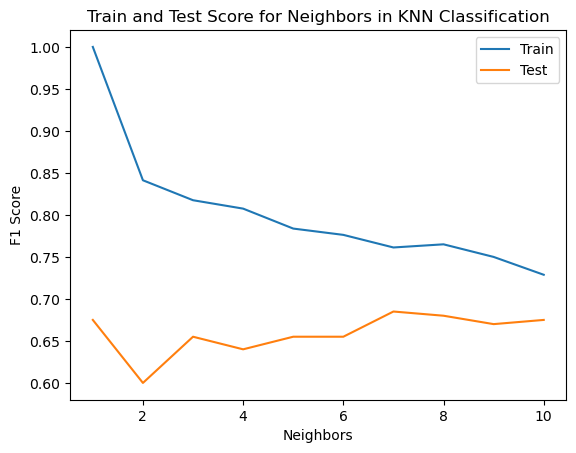

In [35]:
# Find the Optimal K
train_scores = []
test_scores = []
neighbors = []

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit model
    knn.fit(x_train, y_train.ravel())
        
    # Predict using train and test data
    y_pred_tr = knn.predict(x_train)
    y_pred_te = knn.predict(x_test)
        
    # Test error using F_1 score
    train_er = f1_score(y_train, y_pred_tr, average='micro')
    test_er = f1_score(y_test, y_pred_te, average='micro')
        
    # Add error values to the list for plotting
    train_scores.append(train_er)
    test_scores.append(test_er)
    neighbors.append(k)
    
print(train_scores)
print(test_scores)
print(neighbors)

# Plot errors on a graph
plt.plot(neighbors, train_scores, label='Train')
plt.plot(neighbors, test_scores, label='Test')
plt.xlabel("Neighbors")
plt.ylabel("F1 Score")
plt.title('Train and Test Score for Neighbors in KNN Classification (30 sec)')
plt.legend()

Optimal amount of neighbors is k=7

In [36]:
# Train the Model under Ideal Parameters
knn = KNeighborsClassifier(n_neighbors=7)

# Fit model to the data
knn.fit(x_train, y_train.ravel())

# Predict the labels of the test data set
y_pred = knn.predict(x_test)

# Get the confusion Matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)

Text(0.5, 1.0, 'Genre Classification Using K-Nearest Neighbors Classification (30 sec)')

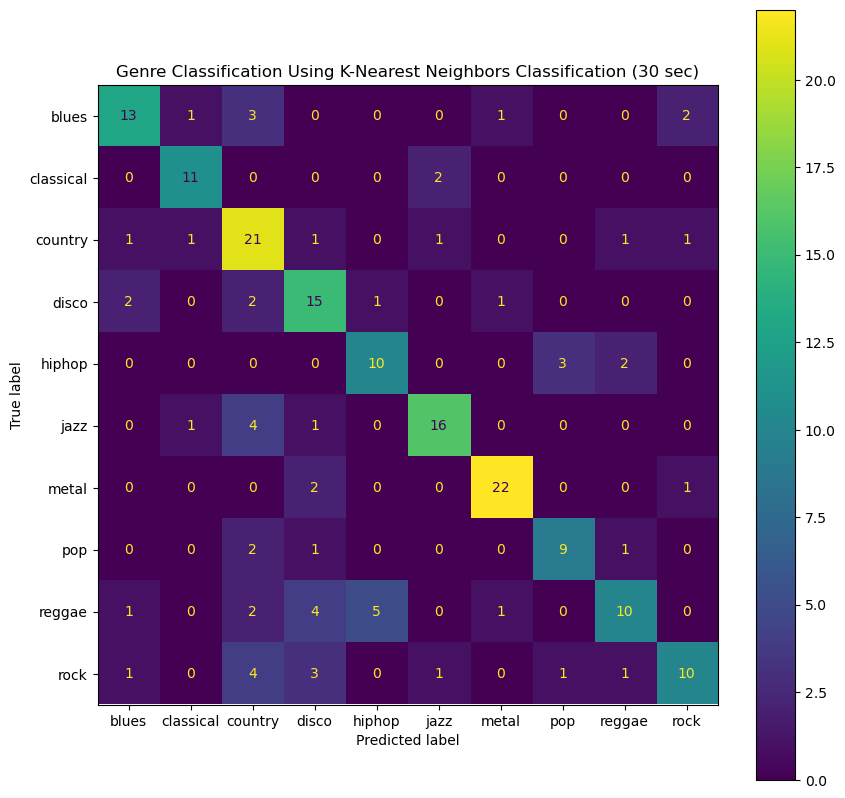

In [38]:
# Displays the Confusion Matrix
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y_test))
conf_mat_disp.plot()

plt.gcf().set_size_inches(10, 10)

# Turns off the grid
plt.grid(False)

plt.title("Genre Classification Using K-Nearest Neighbors Classification (30 sec)")

### Linear/Quadratic Discriminant Analysis